In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
image = cv2.imread("data/apple2.jpg")
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Find the contour of the apple

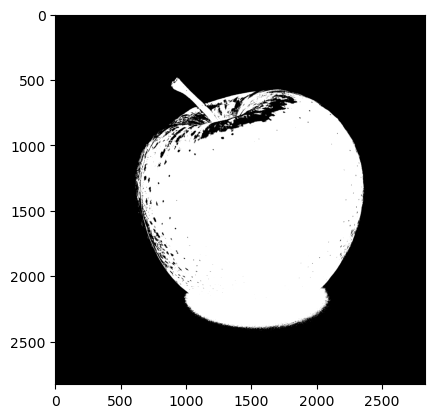

In [3]:
# create a binary thresholded image
_, thresh = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
# show it
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap="gray")

In [4]:
# find the contours from the thresholded image
contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
# draw all contours
img = cv2.drawContours(img_rgb, contours, -1, (0, 255, 0), 2)

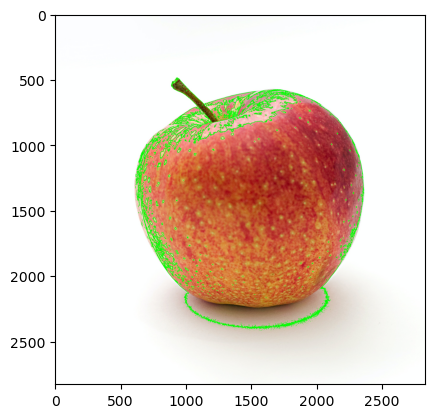

In [5]:
# show the image with the drawn contours
plt.imshow(img)
plt.show()

Draw a yellow circle with the center placed on the center of the apple contour

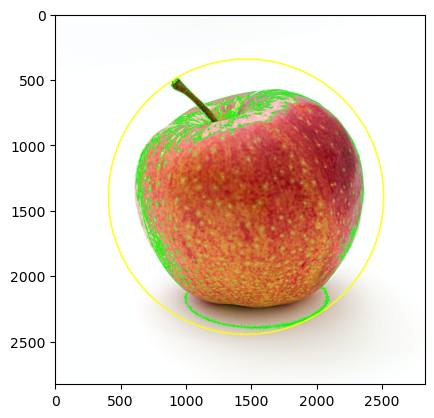

In [6]:
c = max(contours, key=cv2.contourArea)
((x, y), radius) = cv2.minEnclosingCircle(c)
image_circle = img.copy()
cv2.circle(image_circle, center=(int(x), int(y)), radius=int(radius), color=(255, 255, 0), thickness=10)

plt.imshow(image_circle)

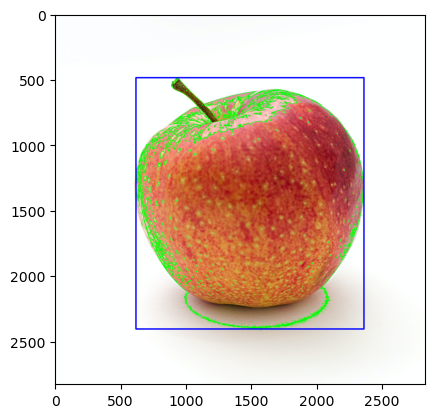

In [7]:
x, y, w, h = cv2.boundingRect(c)
image_rect = img.copy()
cv2.rectangle(image_rect, (x, y), (x + w, y + h), (0, 0, 255), 10)

plt.imshow(image_rect)